In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('final_book_dataset_kaggle2.csv')

In [3]:
df.head() 
# relevant aspects are title, n + avg reviews , probably price

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


## Data Cleanning Phase

In [4]:
df.isnull().sum()

title                             0
author                          173
price                           108
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

In [8]:
# we fill the null values by avergae for the determiend columns → 'avg_reviews, n_reviews'

mean = df['avg_reviews'].mean()

# fill NaN values with the mean of each column
df['avg_reviews'].fillna(mean, inplace=True)

In [9]:
df['avg_reviews'].isnull().sum()

0

In [12]:
df['avg_reviews'].dtype

dtype('float64')

In [13]:
df['n_reviews'] = df['n_reviews'].replace(regex={',': ''})

In [14]:
df['n_reviews']

0        23
1       124
2        10
3      1686
4        12
       ... 
825      74
826      93
827       8
828     NaN
829     142
Name: n_reviews, Length: 830, dtype: object

In [15]:
df['n_reviews'] = pd.to_numeric(df['n_reviews'], errors='coerce')    # change data type to numeric

In [17]:
n_reviews_mean = df['n_reviews'].mean()

# fill NaN values with the mean of each column
df['n_reviews'].fillna(n_reviews_mean, inplace=True)

In [18]:
df['n_reviews'].isnull().sum()

0

<Axes: >

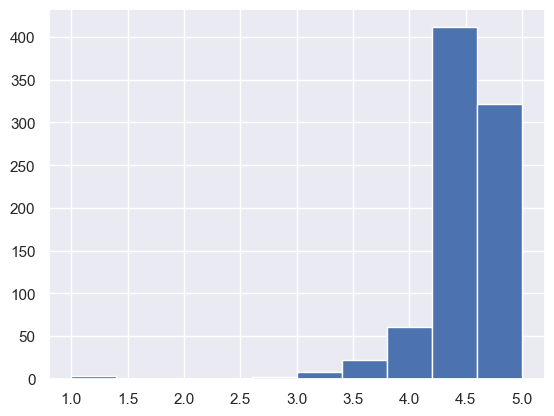

In [19]:
df['avg_reviews'].hist()

<Axes: xlabel='price', ylabel='avg_reviews'>

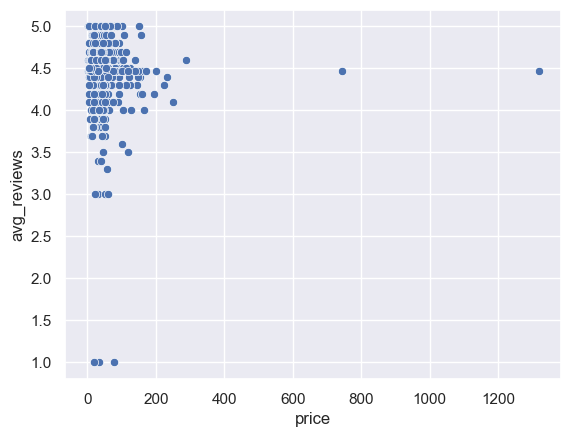

In [22]:
# do more expensinve books have more reviews?

sns.scatterplot(data = df, x= 'price', y = 'avg_reviews')
# answer is no. price is not relevant factor

In [29]:
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')    # change data type to numeric
pages_mean = df['pages'].mean()
df['pages'].fillna(pages_mean,inplace=True)

<Axes: xlabel='price', ylabel='pages'>

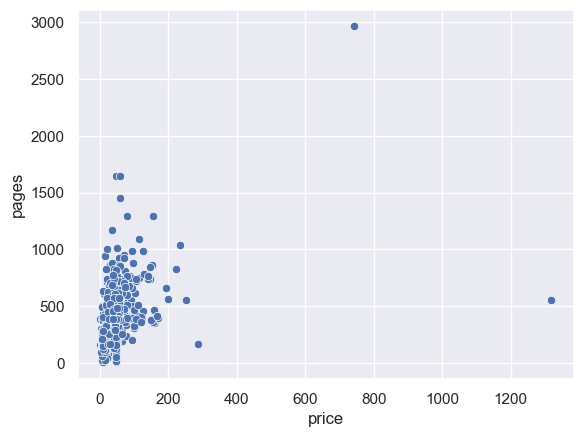

In [30]:
sns.scatterplot(data = df, x= 'price', y = df['pages'])

### What are best python boooks?

In [32]:
python_books = df[df['title'].str.contains("python")]

best_python_books = python_books.nlargest(7, ['n_reviews', 'avg_reviews'])

In [33]:
best_python_books

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
88,Python: 3 books in 1- Your complete guide to p...,NaN,24.95,24.95,472.0,4.6,108.0,79%,10%,7%,2%,1%,6 x 1.07 x 9 inches,1.63 pounds,English,"Independently published (February 4, 2022)",,/Python-programming-Beginners-Programming-Lang...,https://www.amazon.com/Python-programming-Begi...
562,Learn python programming for beginners: A begi...,[ Willard D. Sanders],19.95,19.95,145.0,3.9,21.0,58%,6%,15%,7%,14%,6 x 0.33 x 9 inches,7.2 ounces,English,"Independently published (September 29, 2020)",979-8691180538,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
577,PYTHON: 2 books in 1 : Learn python programmin...,[ Willard D. Sanders],24.90,24.9,241.0,3.8,14.0,40%,27%,15%,9%,9%,6 x 0.55 x 9 inches,13.7 ounces,English,"Independently published (October 28, 2020)",979-8691155918,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...


In [34]:
df['title'].str.contains('python').sum()

3

### Top ML books

In [35]:
ml_books = df[df['title'].str.contains('Machine Learning')]
top_ml_books = ml_books.nlargest(7, ['n_reviews', 'avg_reviews'])

In [36]:
top_ml_books

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
478,"Hands-On Machine Learning with Scikit-Learn, K...",[ Aurélien Géron],57.490000,57.49,856.000000,4.80000,3129.000000,85%,10%,3%,1%,2%,7 x 1.2 x 9.2 inches,2.8 pounds,English,"O'Reilly Media; 2nd edition (October 15, 2019)",978-1492032649,/Hands-Machine-Learning-Scikit-Learn-TensorFlo...,https://www.amazon.com/Hands-Machine-Learning-...
701,Machine Learning For Absolute Beginners: A Pla...,NaN,46.491537,NaN,167.000000,4.50000,1123.000000,68%,18%,8%,3%,2%,NaN,NaN,English,"Scatterplot Press; 2nd edition (June 21, 2017)",NaN,/Machine-Learning-Absolute-Beginners-Introduct...,https://www.amazon.com/Machine-Learning-Absolu...
717,The Hundred-Page Machine Learning Book,[ Andriy Burkov],31.990000,26.50 - 31.99,160.000000,4.60000,839.000000,80%,10%,4%,2%,3%,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,"Andriy Burkov (January 13, 2019)",978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
720,Pattern Recognition and Machine Learning (Info...,[ Christopher M. Bishop],105.220000,90.99 - 105.22,738.000000,4.60000,687.000000,76%,13%,6%,3%,2%,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,"Springer (August 17, 2006)",978-0387310732,/Pattern-Recognition-Learning-Information-Stat...,https://www.amazon.com/Pattern-Recognition-Lea...
678,Mathematics for Machine Learning,NaN,48.990000,48.99,398.000000,4.70000,608.000000,80%,13%,3%,2%,2%,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
591,Introduction to Machine Learning with Python: ...,NaN,49.350000,29.76 - 49.35,398.000000,4.50000,591.000000,75%,15%,3%,3%,5%,7 x 0.82 x 9.19 inches,1.3 pounds,English,"O'Reilly Media; 1st edition (November 15, 2016)",978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
134,Data Analytics: Introduction and Guide to Data...,"[ Markus Schellander, Chris Johnson, et al.]",46.491537,NaN,391.078804,4.47208,325.792023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#250 in,/Data-Analytics-Markus-Schellander-audiobook/d...,https://www.amazon.com/Data-Analytics-Markus-S...


## Clustring Book titles
### TF_IDF method to change text to numeric

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2)) #ngram says how many words we want to put together like Data science
x = vectorizer.fit_transform(df['title'])

In [43]:
pd.DataFrame(x.toarray(), columns = vectorizer.get_feature_names_out())     # this represent each book title

,001,01,01 2017,10,10 20gal,10 coding,10 data,10 essential,10 guide,10 minutes,...,zed shaw,zero,zero hero,zero just,zero pro,zipline,zipline python,zoo,zoo med,zoo reptile
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## K means clustring

In [44]:
from sklearn.cluster import KMeans

### The Elbow Method

In [46]:

K = range (2,10)
sum_squared_distance = []
for k in K:
    kmeans = KMeans(n_clusters=k,max_iter=600, n_init=10)  # Set n_init explicitly to suppress FutureWarning
    kmeans.fit(x)
    sum_squared_distance.append(kmeans.inertia_)

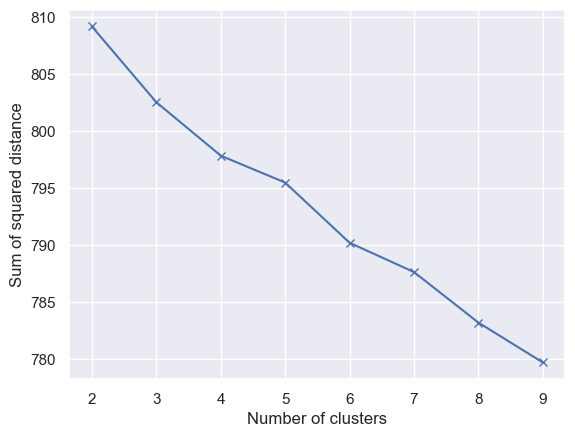

In [47]:
plt.plot(K, sum_squared_distance, 'bx-')  # 'bx-' shows line in each cluster
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()

# sum of squared distance 

In [50]:
# get_cluster
true_k = 6
model = KMeans(n_clusters = true_k, init= 'k-means++', max_iter=600, n_init = 10)
model.fit(x)

KMeans(max_iter=600, n_clusters=6, n_init=10)

In [52]:
# get predictions / labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df['title'], labels)), columns = ['title', 'cluster'])

In [54]:
book_cl.sort_values(by = 'cluster')

,title,cluster
414,Learn Python 3 the Hard Way: A Very Simple Int...,0
554,Learn Python Fast For Absolute Beginners: Lear...,0
574,Real-World Python: A Hacker's Guide to Solving...,0
575,Cracking Codes with Python: An Introduction to...,0
581,The Greedy Python/Ready-to-Read Level 1 (The W...,0
...,...,...
549,Hands-On Gradient Boosting with XGBoost and sc...,5
546,Murach's Python Programming,5
545,"Python Programming for the Absolute Beginner, ...",5
556,Starting Out with Python,5


In [55]:
from wordcloud import WordCloud

<Figure size 1000x800 with 0 Axes>

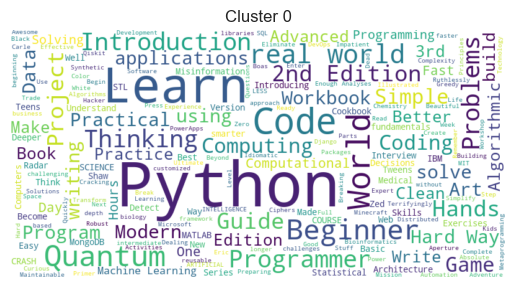

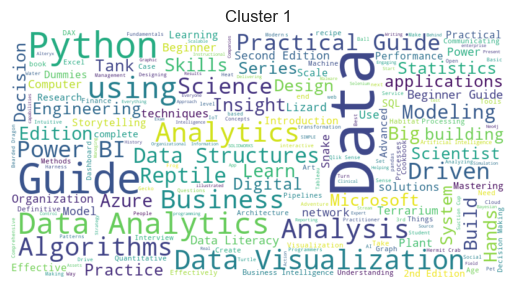

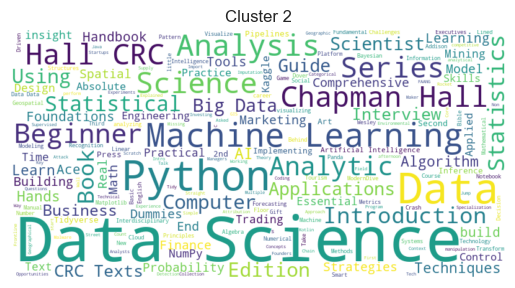

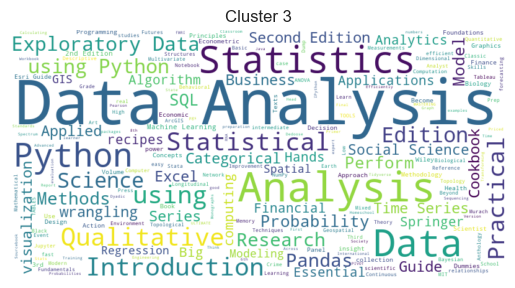

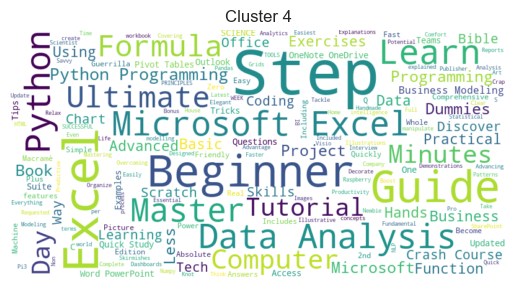

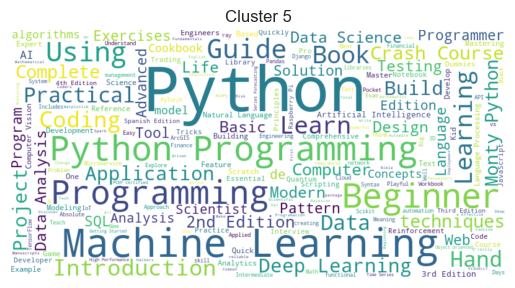

In [63]:
# Generate word clouds for each cluster. NOTE: AUTOMATION IS USED FOR THIS GRAPH MAKING
clusters = book_cl.groupby('cluster')['title'].apply(lambda x: ' '.join(x))
plt.figure(figsize = (10,8))
for cluster_num, titles in clusters.items():
    wordcloud = WordCloud(width=800, height=400, max_font_size = 100 ,background_color='white').generate(titles)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {cluster_num}')
    plt.axis('off')

plt.show()

### Predictions Test of the model

In [65]:
test = vectorizer.transform(['tensorflow deep learning'])
model.predict(test)[0]

5